# RAP

This demonstrates how to use data from the Rapid Refresh (RAP) model. This is perhaps the messiest dataset Herbie tries to look for (lots of sources, different file naming conventions, lots of different products).

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie("2021-11-19", model="rap", product="awp130pgrb")

✅ Found ┊ model=rap ┊ product=awp130pgrb ┊ 2021-Nov-19 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
H.PRODUCTS

{'awp130pgrb': 'CONUS Pressure levels; 13-km resolution',
 'awp252pgrb': 'CONUS Pressure levels; 20-km resolution',
 'awp236pgrb': 'CONUS Pressure levels; 40-km resolution',
 'awp130bgrb': 'CONUS Native levels; 13-km resolution',
 'awp252bgrb': 'CONUS Native levels; 20-km resolution',
 'wrfprs': 'Full domain Pressure Levels; 13-km',
 'wrfnat': 'Full domain Native Levels; 13-km',
 'awip32': 'NOAMHI - High-Resolution North American Master Grid; 32-km resolution',
 'awp242': 'Alaska Quadruple Resolution Pressure levels; 11-km resolution',
 'awp200': 'Puerto Rico Pressure levels; 16-km resolution',
 'awp243': 'Eastern North America Pressure levels, 0.4 degree resolution',
 'wrfmsl': 'WRFMSL; 13-km resolution'}

In [5]:
H.SOURCES

{'aws': 'https://noaa-rap-pds.s3.amazonaws.com/rap.20211119/rap.t00z.awp130pgrbf00.grib2',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/rap/prod/rap.20211119/rap.t00z.awp130pgrbf00.grib2',
 'google': 'https://storage.googleapis.com/rapid-refresh/rap.20211119/rap.t00z.awp130pgrbf00.grib2',
 'azure': 'https://noaarap.blob.core.windows.net/rap/rap.20211119/rap.t00z.awp130pgrbf00.grib2'}

In [7]:
ds = H.xarray("TMP:2 m above")
ds

<xarray.Dataset>
Dimensions:              (y: 337, x: 451)
Coordinates:
    time                 datetime64[ns] 2021-11-19
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rap
    product:                 awp130pgrb
    description:             Rapid Refresh (RAP) from NOMADS and Big Data Pro...
    remote_grib:             https://noaa-rap-pds.s3.amazonaws.com/rap.202111...
    local_grib:              C:\Users\blaylock\data\rap\20211119\subset_5aefe...
    searchString:            TMP:2 m above

Text(0.0, 1.0, 'RAP: CONUS Pressure levels; 13-km resolution')

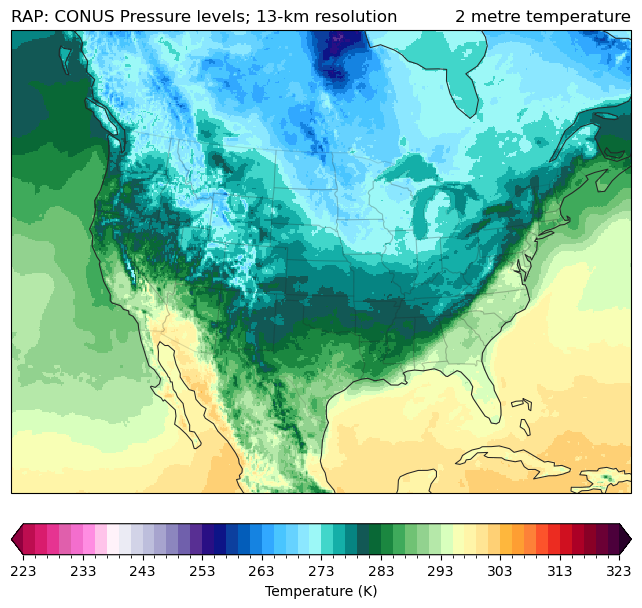

In [9]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

# RAP record on NCEI

In [10]:
H = Herbie("2019-11-23", model="rap_historical", product="analysis")

✅ Found ┊ model=rap_historical ┊ product=analysis ┊ 2019-Nov-23 00:00 UTC F00 ┊ GRIB2 @ rap_130 ┊ IDX @ rap_130


In [11]:
ds = H.xarray("TMP:2 m above")
ds

👨🏻‍🏭 Created directory: [C:\Users\blaylock\data\rap_historical\20191123]


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


<xarray.Dataset>
Dimensions:              (y: 337, x: 451)
Coordinates:
    time                 datetime64[ns] 2019-11-23
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 16.28 16.31 16.34 ... 55.54 55.51 55.48
    longitude            (y, x) float64 233.9 234.0 234.1 ... 302.3 302.4 302.6
    valid_time           datetime64[ns] 2019-11-23
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 298.3 298.4 298.5 ... 274.3 274.3 274.4
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rap_historical
    product:                 analysis
    description:             Rapid Refresh - NCEI Historical
    remote_grib:             https://www.ncei.noaa.gov/data/rapid-refresh/acc...
    local_grib:              C:\Users\blaylock\data\rap_historical\20191123\s...
    searchString:            TMP:2 m above

Text(0.0, 1.0, 'RAP_HISTORICAL: RAP')

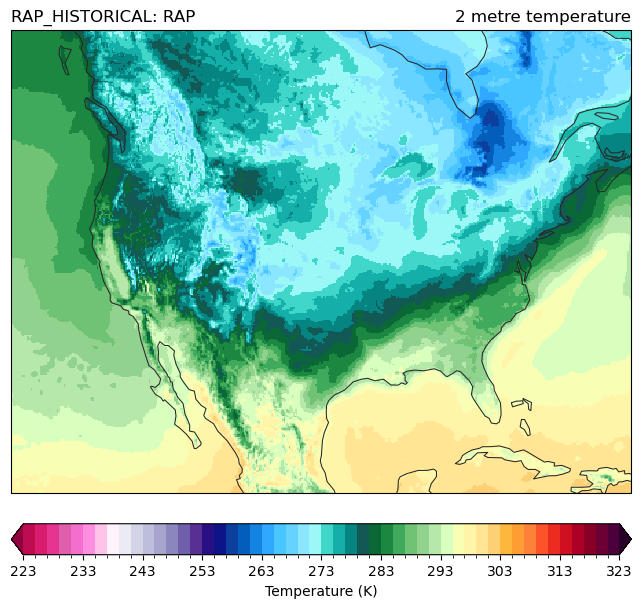

In [12]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")